# Nearest Neighbours and Identification Trees

## Nearest Neighbours

Suppose we are manufacturing electric socket plates, and we have a conveyor belt system where the robotic arm needs to segrigate the electric socket plates of different types as shown below.

![socketPlates](images/SocketPlates.jpg)

As we can see there are 4 different types of plates 

* $ A \rightarrow$ Blank square plate.
* $ B \rightarrow$ Plate with 4 holes in it.
* $ C \rightarrow$ Blank plate with half the size of plate A
* $ D \rightarrow$ Plate with 2 holes and half the size of plate B.

There are multiple ways in which we can solve this problem. For the illustarive purpose of this example, we will use the $PLATE_{area}$  and  $HOLE_{area}$ as the criteira to segrigate the plates.

Now the task of the robotic arm is to pick each plates and put it in 4 different bins near its reach. Let us call the these bins $ A, B, C, D $. Inline with our example image above.

Let us visualize the data based on the $Area_{plate}$  and  $Area_{hole}$

In [123]:
import numpy as np
import matplotlib.pyplot as plt

def myPlt(x,y, alpha=0.8):
    plt.scatter(x,y, alpha=alpha,marker='x',c='r')
    plt.xlabel("Area of the Plate")
    plt.ylabel("Area of the hole")
    plt.ylim(0,10)
    plt.xlim(0,12)
    #plt.plot(x,y,'--',zorder=2)
    plt.show()
    return

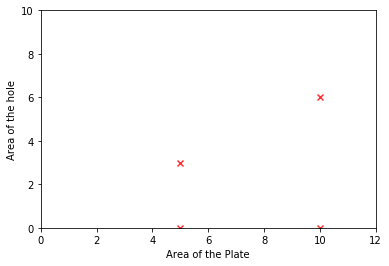

In [124]:
x = np.array([10,5,10,5])
y = np.array([0,0,6,3])
myPlt(x,y)

Our Manufacturing systems is not perfect yet and produces some faulty pieces with different dimentions than what is specified. The result of one the piece falls co-ordinates on the graph as shown below.

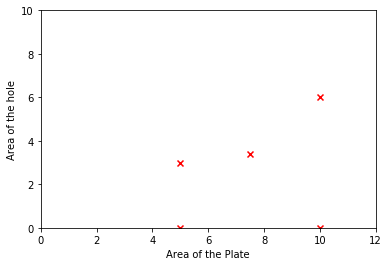

In [125]:
x = np.array([10,5,10,5,7.5])
y = np.array([0,0,6,3,3.4])
myPlt(x,y,alpha=1)

Now our robotic arm has tough time in deciding which bin it has to place this faulty piece in? That is when we need put some boundary condition to help the robot. 

Now let us help our robotic arm by creating a model which decides the boundary condition, the model used is called Nearest Neighbours.

## Steps to create the Nearest Neighbours boundary:

#### Step 1 & 2:
Connect all the 4 points $ A,B,C,D$ as shown below
![](images/DecisionBoundary.jpg)

#### Step 3 & 4:

Draw a perpendicular bisector for each of the lines as shown below. Extened the perpendicular bisector, if required in either direction till we find a common intersection point between the perpendicualr bisector (atleast 2).

![](images/DecisionBoundary2.jpg)

Now, draw the thick lines and connect the perpendicular bisector lines, These thick lines represent the Nearest Neighbours Boundary.

# Distance Metrics:

## 1. Euclidean Disatance

$ D(\vec{u},\vec{v}) = \sqrt{\sum{(u-v)^2}}$

![](images/EuclideanDistance.jpg)

## 2. Manhattan Disatance
Example:
If you take a taxi, taxi has to travel along the horizontal and vertical roads, taxi cannot cut through the buildings to reach the final destination it has to move along the horizontal or vertical axis.

$D(\vec{u},\vec{v}) = \sum{\|u-v\|}$

![](images/ManhattonDistance.jpg)

## 3. Cosine Distance

Example: When we talk about the receipies of a cake, when we scale the cake from 1KG cake to 100KG, then it makes sence to think of it as a propotional increase in the raw ingradients rather than its eculedian distance mesures. 

$D(\vec{u},\vec{v}) =  \cos(\theta) = \frac{\vec{u} \cdot \vec{v}}{\|\vec{u}\| \cdot \| \vec{v} \|}$

![](images/CosineDistance.jpg)

## 4. Hamming Distance

$D(\vec{u},\vec{v}) = \sum{differences(\vec{u},\vec{v})}$

Example 1:

$$\vec{u}(\Delta, red, soft) \rightarrow eq-1$$
$$\vec{v}(\Delta, blue, soft) \rightarrow eq-2$$

Hamming distance between 'eq-1 and eq-2' is 1. as one variable is different. i.e red and blue.

Example 2:

$$\vec{u}(\alpha, red, hard) \rightarrow eq-1$$
$$\vec{v}(\alpha, blue, soft) \rightarrow eq-2$$

Hamming distance between 'eq-1 and eq-2' is 2. Because 2 variables are different. i.e red and blue, hard and soft.

### Supervised Machine Learning:

Supervised ML objective is, given a set of data and known features and known classifcation, we need find the rules to classify some new point of same or similar kind to the original data.



|slno|$X_1$|$X_2$| $X_3$|.....|$X_n$|$Y$|
|---|---|---|---|---|---|---|
|1  |     |     |     |     |     |   |
|2  |     |     |     |     |     |   |
|3  |     |     |     |     |     |   |


Here $X_1, X_2, ... X_n$ are called features and $Y$ is called Lable or Classification.


Below table is an example to learn and identify given a new set of charecteristics and  classify with the given set of values, turns out to be a **Vampire** or not.

|sl no|Shadow|Garlic|Complexion|Accent|Vampire|
|---- | ---- |----  | ----      | ---  | ----- |
|1|?|Yes|Pale|None|No|
|2|Yes|Yes|Ruddy|None|No|
|3|?|No|Ruddy|None|Yes|
|4|No|No|Average|Heavy|Yes|
|5|?|No|Average|Odd|Yes|
|6|Yes|No|Pale|Heavy|No|
|7|Yes|No|Average|Heavy|No|
|8|?|Yes|Ruddy|Odd|No|


Here, **Shadow, Garlic, Complextion are Accent ** are called features and **Vampire** is the lable for the classifier.

We cannot apply the normal Nearest Neighbour boundary for this above data set for the following reason.

* Data set is **NOT Numeric**. In other words data is categorical.
* Some charecteristics  doesn't matter.
* Some charecteristics do really matter some time.
* Cost of computation

Some of the tests might be expensive. So it is clear we need to build little trees of tests on set of samples.

How to arrange these little trees to Identify 

Charecteristics of good test trees. 
* Minimal number of layers.
* Minimal cost.
* it should be as simple as possible and should separate the data effectively.

Identification trees are not Decision Trees. Decision Trees tend to get bigger and bigger, where as Identification trees should always remain smaller.


With these set of information let's start building the Identifcation tests one by one on each of the features. 

So, in our test example, we will have following tests.

* Shadow Test
* Garlic Test
* Complexion Test
* Accent Test

Before we build the tree let us take a quick peek and see how each tree looks like.

In [126]:
def pltQtests():
    import matplotlib.image as mpimg
    path = 'images/'
    imgs = ['ShadowTest.jpg', 'GarlicTest.jpg', 'ComplexionTest.jpg', 'AccentTest.jpg']
    #lables = ['Shadow Test', 'Garlic Test', 'Complexion Test', 'Accent Test']
    dispImgs = [mpimg.imread(path+i)for i in imgs]

    plt.figure(figsize=(20,16))
    for i,val in enumerate(dispImgs):
        plt.subplot(2,2,i+1)
        #plt.title(lables[i])
        plt.imshow(dispImgs[i],)
    plt.show()
    return

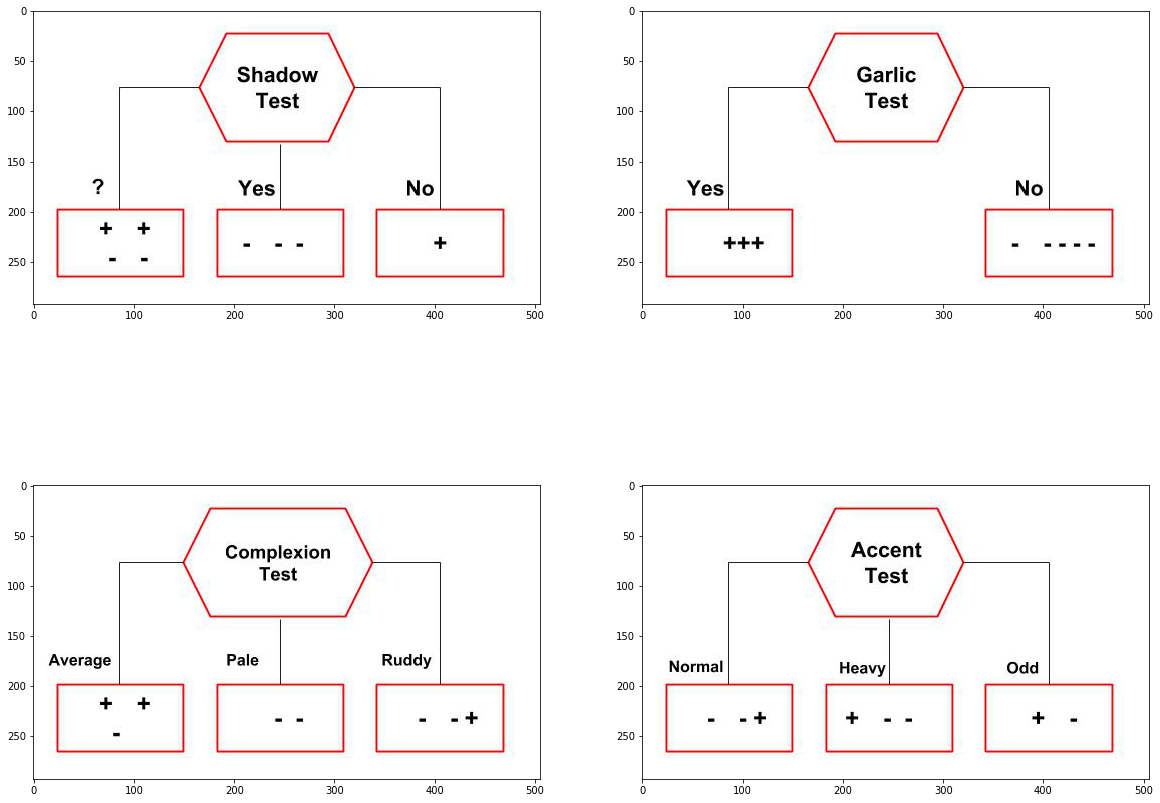

In [127]:
pltQtests()

As we can see **Shadow Test** has 3 branches out of it, this is because shadow column has 3 different values in it
* ?
* Yes
* No

Similarly Garlic column has 2 values, hence 2 branches
* Yes
* No

Complexion column has 3 values
* Average
* Pale
* Ruddy

Accent column has 3 values
* Normal 
* Heavy 
* Odd

Also notice that all the column values are having **categorical** data.

### Entropy and Information Gain

Before we get in to next step it is important to understand some of the basic concepts of Entropy and Information Gain. As we will be using the ideas in building the ID trees.



Disorder '$D$' of some set is given by.

$D(set) =  - \frac {P}{T} \cdot ln(\frac {P}{T}) -  \frac {N}{T} \cdot ln(\frac {N}{T}) \longrightarrow (1)$

Where 

$P \rightarrow Positive Samples$   ,   $N \rightarrow Negetive Samples$ ,   $T \rightarrow Total Samples$


Suppose if there are equal Positive and Negative Samples are present then

$ P = \frac {T}{2} \Rightarrow \frac {P}{T} = \frac{1}{2} \longrightarrow (2)$

Similarly

$ N = \frac {T}{2} \Rightarrow \frac {N}{T} = \frac{1}{2} \longrightarrow (3)$

Substituting $ (2) $ and $ (3) $ in $ (1) $

$D(set) =  - \frac {1}{2} \cdot ln(\frac {1}{2}) -  \frac {1}{2} \cdot ln(\frac {1}{2}) $

$\Rightarrow D(set) = 1 \longrightarrow (4)$


Similarly if $P = T$ OR $ N = T$ eq.1 becomes.


$D(set) =  - \frac {1}{1} \cdot ln(\frac {1}{1}) -  0 = 0$  (By appling the L'hospital rule.)


### Quality of Test

$Q(test) = \sum_{Set_Produced} D(set) \ast \frac {N_{of Samples in set}}{N_{of samples handled by test}}  \longrightarrow (5) $

### Step 1:
Now, we are ready to tackle the problem, from where we left off. Let us start with **Shadow Test** because that is the first column/feature in the tabular column.

![](images/ShadowTest.jpg)

we know that there are 3 types of values in the Shadow column 
* ?
* Yes
* No

That explains the 3 branches in the above image. But so far we did not discuss about the $+$ and $-$ values in each of the sub boxes. Let us try to understand that now.

Let us take '$?$' value branch, if we extract only those rows with $?$ from the tabular column, it looks something like the one as shown below.

|sl no|Shadow|Garlic|Complexion|Accent|Vampire|
|---- | ---- |----  | ----      | ---  | ----- |
|1|?|Yes|Pale|None|No|
|3|?|No|Ruddy|None|Yes|
|5|?|No|Average|Odd|Yes|
|8|?|Yes|Ruddy|Odd|No|

Here if we see that there are 2 positive samples and 2 negative samples. i.e row-3 and row-4 are having the Lable "Vampire" equal to "Yes" and row-1 and row-8 are having the lable equal to "No". That explains why there are 2 $+$ and 2 $-$ entries in our figure above.


Similarly now let us decode the "Yes" branch.


|sl no|Shadow|Garlic|Complexion|Accent|Vampire|
|---- | ---- |----  | ----      | ---  | ----- |
|2|Yes|Yes|Ruddy|None|No|
|6|Yes|No|Pale|Heavy|No|
|7|Yes|No|Average|Heavy|No|

That looks pretty simple all the lables are $-$ and hence there are 3 '$-$' in the "Yes" branch.


Similarly now let us decode the "No" branch.


|sl no|Shadow|Garlic|Complexion|Accent|Vampire|
|---- | ---- |----  | ----      | ---  | ----- |
|4|No|No|Average|Heavy|Yes|

We have only one row and the lable is "Yes" and hence we have one '$+$' entry in the "No" branch.


Now we know how the $+$ and $-$ values arrived in each of the branches in each of the Tests below as shown in image.

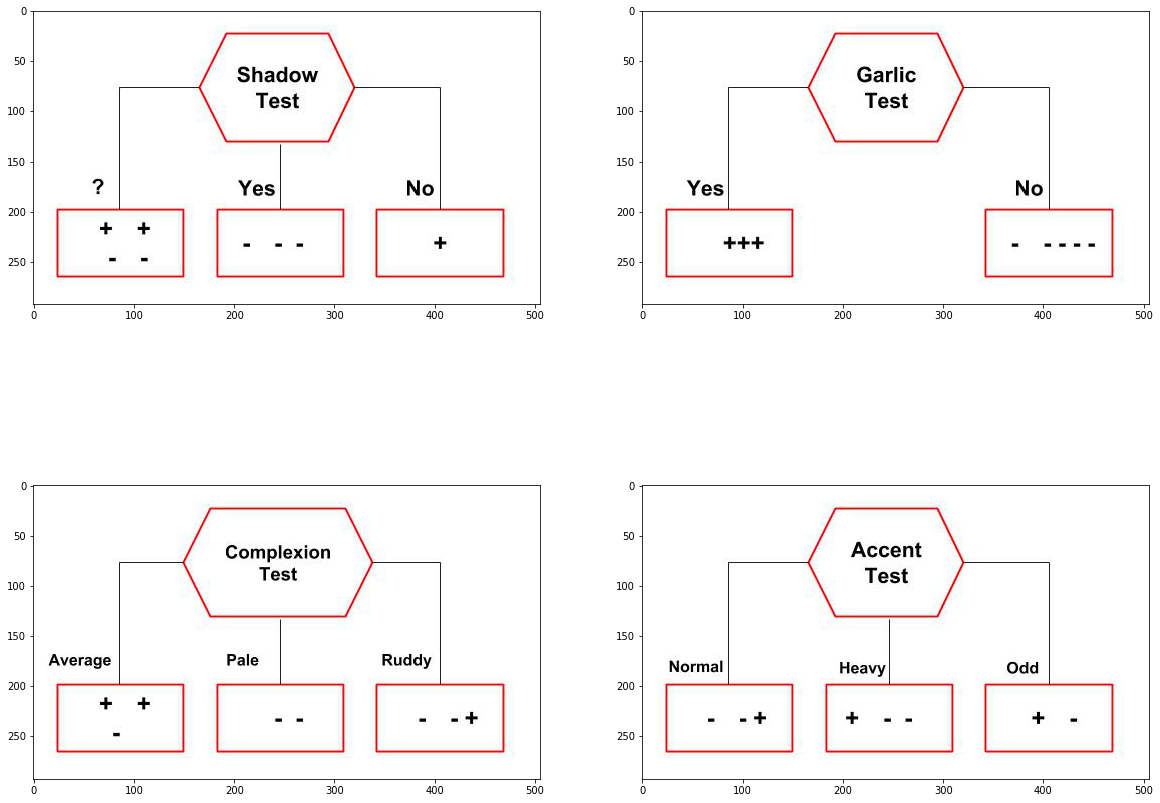

In [128]:
pltQtests()

### Step 2:

Calculate the $D(set)$ from  $eq(1)$ for each of the test on each of the branch.

From our data set we know that

$T = 8$

#### Step 2.1:

Let us calculate the $D(set)$ for the branch $?$ as we can see we have 4 samples in the $?$ branch, 2 positive and 2 negative, this is similar to $eq.2$ and $eq.3$

$D(Set_{_?}) = 1$

Similarly

$D(Set_{_Yes}) = 0 $ because all the values are $-$ve

and

$D(Set_{_No}) = 0 $ because all the values are $+$ve





### Step 3:

Let us calculate the Quality of the test for the **Shadow Test**.

We know from $eq.5$

$Q(test) = \sum_{_Set_Produced} D(set) \ast \frac {N_{of Samples in set}}{N_{of samples handled by test}} $

$Q(test) = D(Set_{_?}) \ast \frac {4}{8} + D(Set_{_Yes}) \ast \frac {3}{8} + D(Set_{_No}) \ast \frac {1}{8} $

$Q(test) = 1 \ast \frac {4}{8} + 0 \ast \frac {3}{8} + 0 \ast \frac {1}{8} = 0.5$

$Q(test) = 0.5$

$Q(ShadowTest) = 0.5 $


Now following the same steps on **Garlic Test, Complexion Test and Accent Test ** we get the values as shown in the below table.

|sl.no|$Q(test)$| Value|
|---  | ----    | ---- |
| 1   |Shadow   | $0.5$|
| 2   |Garlic| $0.6$|
| 3   |Complexion| $0.7$|
| 4   |Accent   | $0.95$|


From the table it is clear that $Q(ShadowTest) = 0.5$ is the smallest test score so we pick the ShadowTest in our round one and try to segregate the remining misclassified samples on the **Shadow Test Tree**



### Round 2:

In round 2 we follow all the steps as above but this time our $T = 4$. Because Shadow Tree has already correctly classified the 4 samples in "Yes" and "No" branches. Only samples which needs to be classified correctly are the one which is sitting in the Branch $?$.

Clearly, we cannot use the **Shadow test** to sub classify the **Shadow Test Tree** we need to use the remaining test trees.
It will help if we strike out the already classified values and concentrate only on the values yet to be classifed.

![](images/VampireDataRound2.JPG)

let below Tabular column be our new data

|sl no|Garlic|Complexion|Accent|Vampire|
|---- | ---- |----  | ----      | ---  | ----- |
|1|Yes|Pale|None|No|
|2|No|Ruddy|None|Yes|
|3|No|Average|Odd|Yes|
|4|Yes|Ruddy|Odd|No|


For Garlic Test

|Garlic| $+$ | $-$| Total|
|------|-----|----| -----|
|Yes   |  0  | 2  |  2   |
|No    |  2  | 0  |  2   |


$D(Set_{_Yes}) = 0 $ ,  $D(Set_{_No}) = 0 $ 

$Q(test) = D(Set_{_{Yes}}) \ast \frac {2}{4} + D(Set_{_{No}}) \ast \frac {2}{4}$

$Q(test) = 0 \ast \frac {1}{2} + 0 \ast \frac {1}{2} $

$Q(test) = 0$

$D(Set_{_Yes} = 0$ and $D(Set_{_No} = 0$ which gets the $Q(test) = 0$

Clearly There could be no other test better than the garlic test with $Q(test) = 0 $ and we can stop here. But for the practice purpose let us continue  to Calculate the $D(Set_{_{Complexion}})$ and $D(Set_{_{Accent}})$

**Table for the Complexion:**

|Complexion| $+$ | $-$| Total|
|----------|-----|----| -----|
|Pale      |  0  | 1  |  1   |
|Average   |  1  | 0  |  1   |
|Ruddy     |  1  | 1  |  2   |


$D(Set_{_Pale}) = 0 $ ,  $D(Set_{_Average}) = 0 $ and $D(Set_{_Ruddy}) = 0.5 $

$Q(test) = D(Set_{_{Pale}}) \ast \frac {1}{4} + D(Set_{_{Average}}) \ast \frac {1}{4} + D(Set_{_{Ruddy}}) \ast \frac {2}{4} $

$Q(test) = 0 \ast \frac {1}{4} + 0 \ast \frac {1}{4} + 1 \ast \frac {1}{2} $

$Q(test) = 0.5$


**Table for the Accent:**

|Accent| $+$ | $-$| Total|
|----------|-----|----| -----|
|None      |  1  | 1  |  2   |
|Odd       |  1  | 1  |  2   |

$D(Set_{_None}) = 0.5 $ and $D(Set_{_Odd}) = 0.5 $

$Q(test) = D(Set_{_{None}}) \ast \frac {2}{4} + D(Set_{_{Odd}}) \ast \frac {2}{4} $

$Q(test) = 1 \ast \frac {1}{2} + 1 \ast \frac {1}{2} = 1$


After Round 2 $Q(test) $ looks as follows.

|sl.no|$Q(test)$| Value|
|---  | ----    | ---- |
| 1   |Garlic| $0$|
| 2   |Complexion| $0.5$|
| 3   |Accent   | $1$|

Clearly Garlic test Segregated the data efficiently.

So our final tree looks like the one shown below.

![](images/ShadowTest2.jpg)

The **Identification Trees** works great not only on the **Categorical Data** but works equally well on the **Numric or Contineous Data**.

ID Trees segregate the data by generating boundaries either parallel to X or Y axis. Hence it is computationally simpler.

An Example comparision data for the ID tree boundaries on the Electiric socket plate classification is as shown below.

![](images/DecisionBoundary3.jpg)